In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
import tqdm
from plotting_setup import *

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline, sinks
from pipeline_streamers import infall_sphere 



Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:34<00:00, 120.12it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:26<00:00, 159.45it/s]


Converged mean angular momentum vector after 1 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:01<00:00, 2421.20it/s]


Disk size: 64.4 au
27792.579822089523


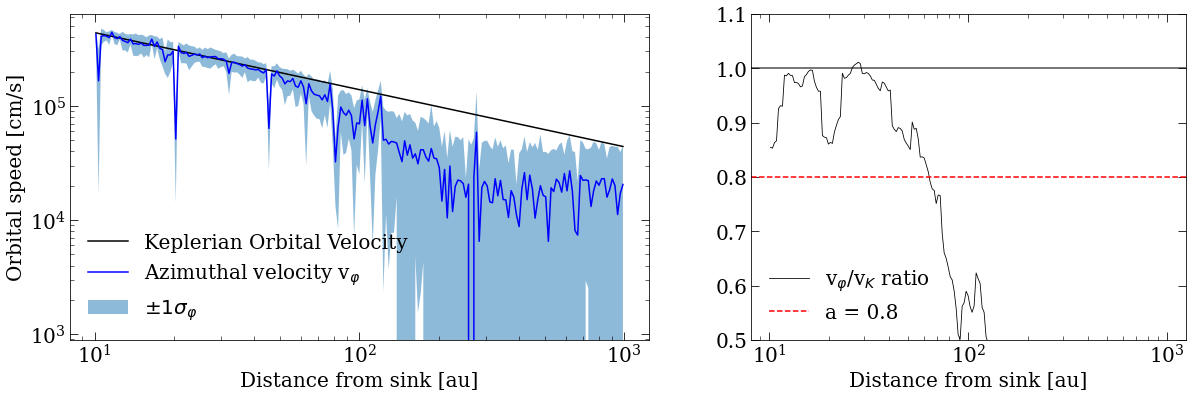

In [11]:
first_snap = 223
last_snap = 362

data_name = 'sink13fmr05'
datai = pipeline(snap = first_snap, run = data_name, sink_id=13)
data = pipeline(snap = last_snap, run = data_name, sink_id=13)

data.recalc_L(verbose = 1); 
data.calc_disksize()
print(data.time - datai.time)

In [12]:
step = (last_snap - first_snap) / 3 
print(step)
snapshots = np.arange(first_snap, last_snap + 1, step).astype(int); 
snapshots

46.333333333333336


array([223, 269, 315, 361])

In [13]:
hammer_data = {}
snap_time = np.zeros_like(snapshots)
for i, sh in tqdm.tqdm(enumerate(snapshots)):
    print(i)
    while True:
        try: 
            data = pipeline(snap = sh, run = data_name, sink_id=13, loading_bar = False, verbose = 0)
            break
        except:
            sh += 1
            print('Going to next snapshot')
    data.recalc_L(); data.calc_trans_xyz(verbose = 0)
    hammer_data[sh] = data.infall_sphere(shell_r=50, get_data=True, plot = False, verbose = 0)
    snap_time[i] = data.time - datai.time 

0it [00:00, ?it/s]

0
Converged mean angular momentum vector after 1 iteration(s)


1it [00:11, 11.68s/it]

1
Converged mean angular momentum vector after 0 iteration(s)


2it [00:28, 14.81s/it]

2
Going to next snapshot
Converged mean angular momentum vector after 0 iteration(s)


3it [00:46, 16.08s/it]

3
Converged mean angular momentum vector after 1 iteration(s)


4it [01:03, 15.77s/it]


In [14]:
range_plot = 1e-8; linear_threshold = 1e-13;
fig, axs = plt.subplots(2,2, figsize = (20,20), subplot_kw={'projection': 'hammer'})

for i, sn in zip(range(len(snapshots)), hammer_data):

    lon, lat, proj_data, total_infall, _ = hammer_data[sn]
    print(i)
    Lon , Lat = np.meshgrid(lon, lat, indexing = 'ij')
    ax = axs.flatten()[i]
    ax.set_yticks([]); ax.set_xticks([])
    im = ax.pcolormesh(lon, lat, proj_data, cmap='coolwarm', snap = False, norm=colors.SymLogNorm(linthresh = linear_threshold, linscale = 0.5, vmin = -range_plot, vmax = range_plot), shading = 'gouraud')
    ax.set_title(f'T = {snap_time[i]/1e3:1.1f} kyr, Total infall: {total_infall*1e6:2.2f} 10$^{{-6}}$ M$_\odot$/yr')

   
fig.subplots_adjust(wspace=0, hspace=0.5)
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), fraction = 0.1, pad = -0.38, location = 'bottom')
cbar.set_label('Mass accretion per area [M$_\odot$ yr$^{-1}$]', labelpad = -70, rotation = 0, fontsize = 20)
plt.tight_layout()
#plt.savefig(save_folder + '/hammer_timeevolution_sink13', facecolor='w', dpi = 500, bbox_inches='tight')

0


array([ 0.87659772, -0.47631607, -0.06855243])